# The main objective of this project is to identify the most responsive customers before the marketing campaign so that the bank will be able to efficiently reach out to them, saving time and marketing resources.To achieve this objective, classification algorithms will be employed. By analyzing customer statistics, a classification model will be built to classify all clients into two groups: "yes" to term deposits and 'no' to term deposits.

# Classification Task:
1.Apply two voting classifiers - one with hard voting and one with soft voting
2.Apply any two models with bagging and any two models with pasting.
3.Apply any two models with AdaBoost boosting
4.Apply one model with gradient boosting
5.Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare a similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
6.Apply deep learning models covered in class

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('bank-additional.csv')

In [4]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [5]:
data.shape

(4119, 21)

In [6]:
data.y.value_counts()

no     3668
yes     451
Name: y, dtype: int64

# bank client data:

1 - age: (numeric)
2 - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education: (categorical: primary, secondary, tertiary and unknown)
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
8 - balance: Balance of the individual.

# Related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: 'cellular','telephone') 
10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
11 - day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15 - previous: number of contacts performed before this campaign and for this client (numeric)
16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9+ KB


In [8]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# data.describe()

# Check for imbalances in the target varaiable

In [9]:
data["y"].value_counts()

no     3668
yes     451
Name: y, dtype: int64

# Check how numerical variables are distribured across the dataset

In [10]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


We see that the value of the outliers are not so unrealistic (max('age')=88 and max('campaign')=35). Hence, we need not remove them since the prediction model should represent the real world. This improves the generalizability of the model and makes it robust for real world situations. The outliers, therefore, are not removed.

# Explore

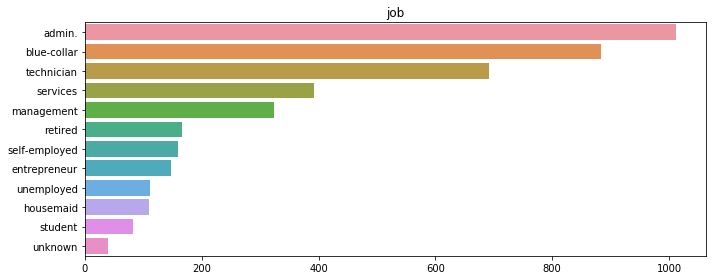

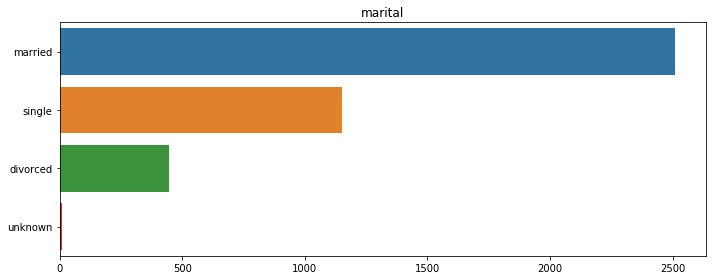

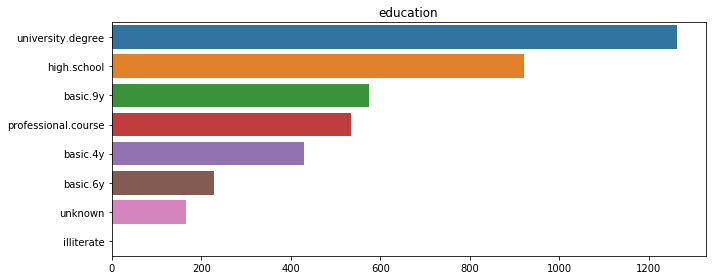

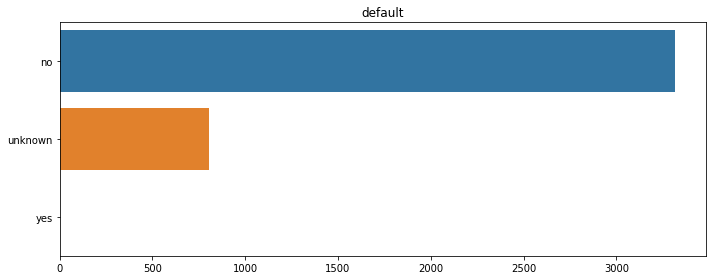

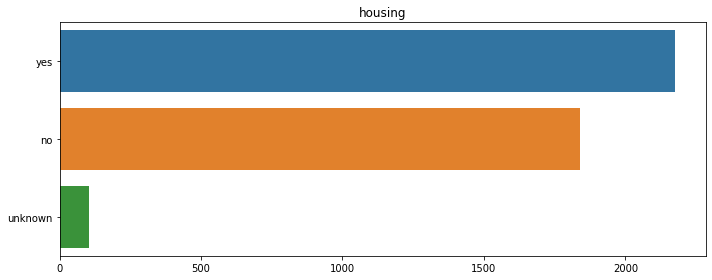

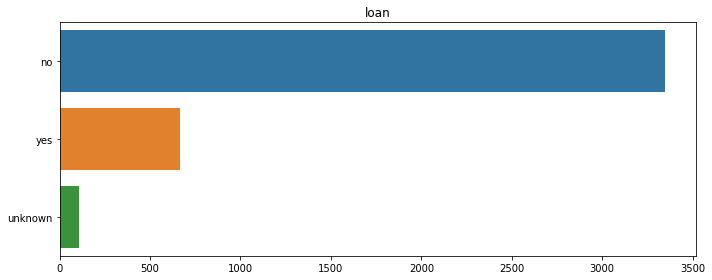

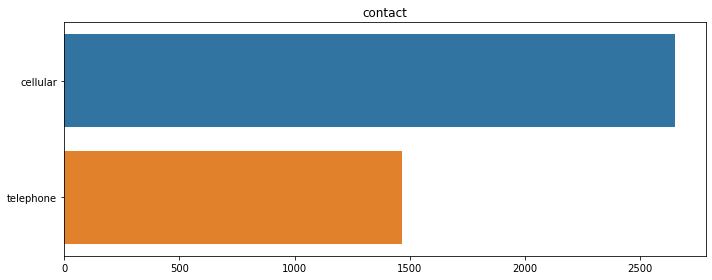

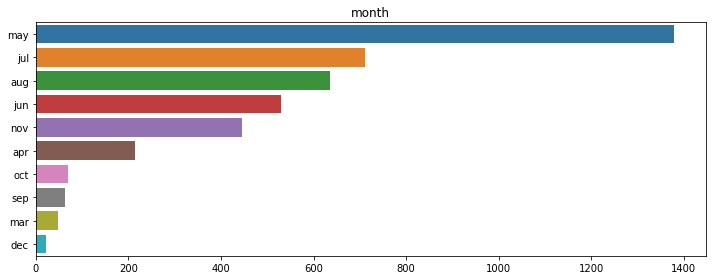

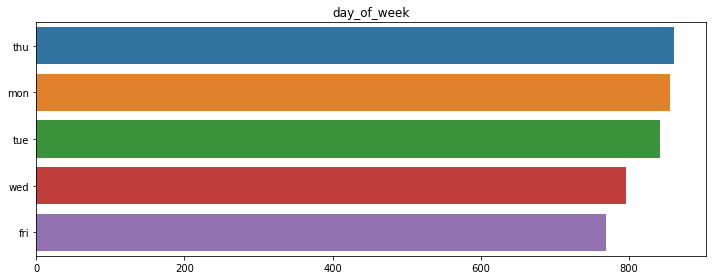

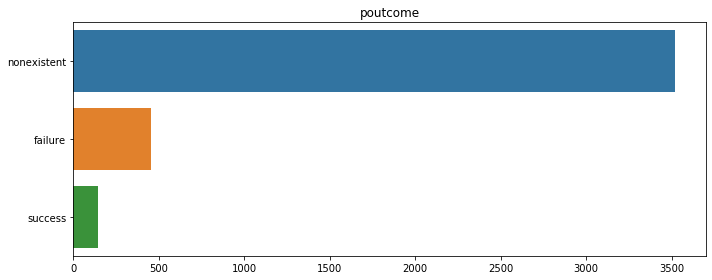

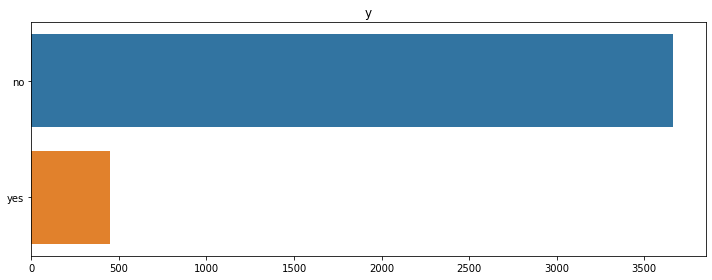

In [11]:
categorcial_variables = ['job', 'marital','education','default','housing','loan','contact','month', 'day_of_week','poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(data[col].value_counts().values, data[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

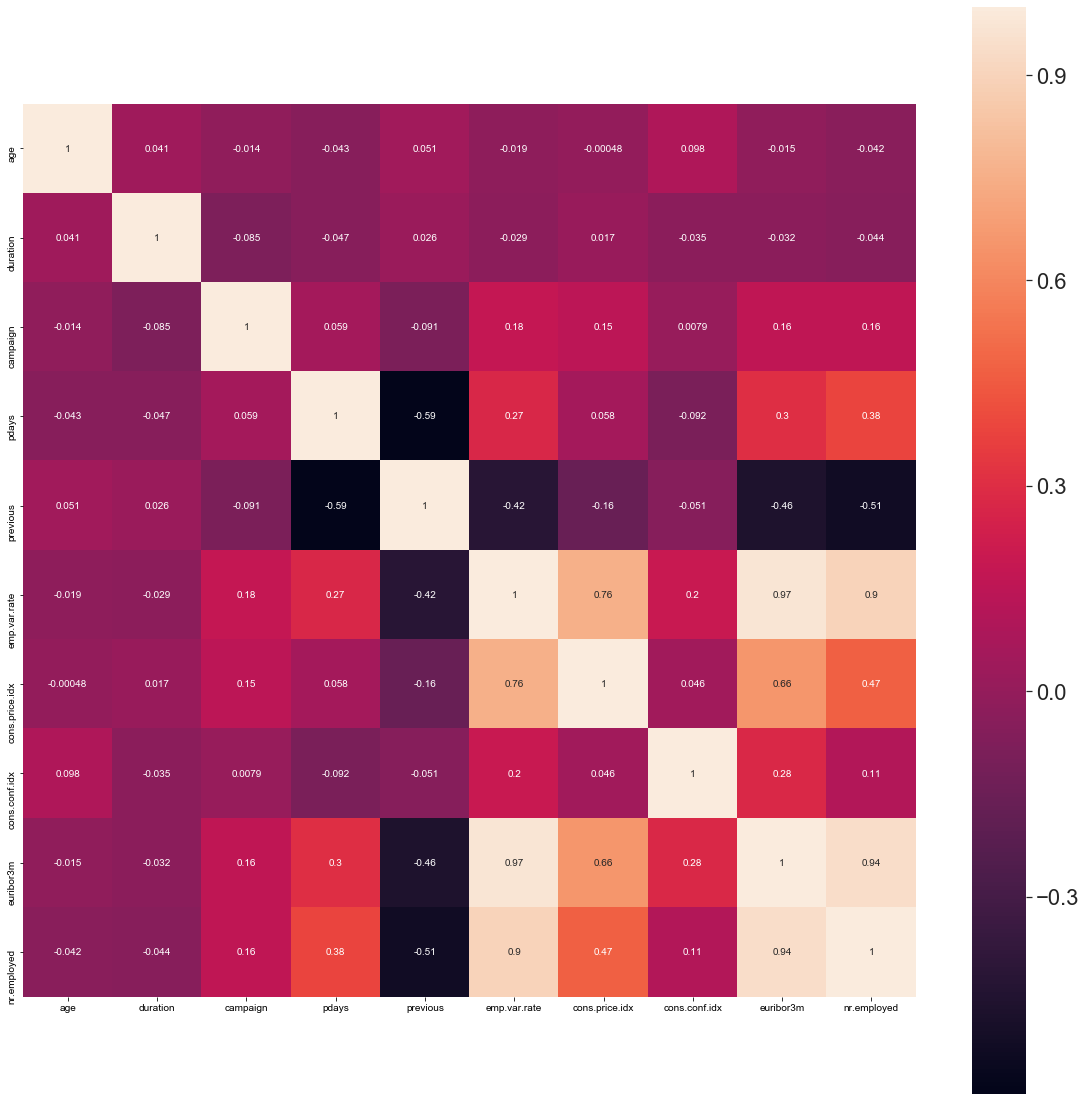

In [12]:
import seaborn as sns
fig = plt.subplots(figsize = (20,20))
sns.set(font_scale=2.0)
sns.heatmap(data.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

# Target Variable

In [13]:
data['y'].value_counts()

no     3668
yes     451
Name: y, dtype: int64

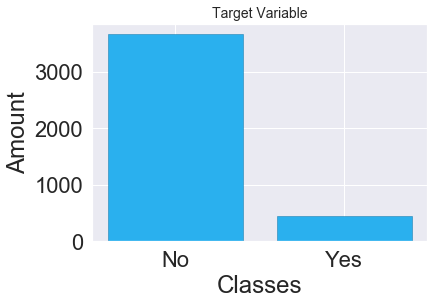

In [14]:
plt.bar(['No', 'Yes'], data.y.value_counts().values, facecolor = '#2ab0ee', edgecolor='#167aaa', linewidth=0.5)
plt.title('Target Variable', fontsize=14)
plt.xlabel('Classes')
plt.ylabel('Amount')
plt.show()

Target variable is extremely imbalanced. This is important to remember when performing classification and evaluation, because even without using of machine learning I can make predictions with roughly 90% accuracy just by guessing none of the clients subscribed to the term deposit. Since we are focused only on the clients that said 'Yes', chances to get predictions are very thin.



In [15]:
data.y.replace({'yes': 1, 'no': 0}, inplace=True)

# Previous results of marketing campaign

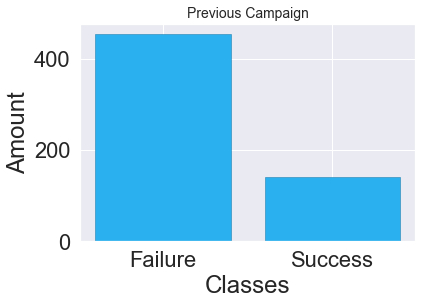

In [16]:
plt.bar(['Failure', 'Success'], [sum(data.poutcome=='failure'), sum(data.poutcome=='success')], \
        facecolor = '#2ab0ee', edgecolor='#167aaa', linewidth=0.5)
plt.title('Previous Campaign', fontsize=14)
plt.xlabel('Classes')
plt.ylabel('Amount')
plt.show()

# Returned clients that subscribed to the new term deposit¶


In [17]:
returned_customers = len(data[(data.poutcome=='success') & (data.y==1)])/len(data[data.poutcome=='success'])
print('Returned clients who has subscribed to the new term deposit: {}%'.format(round(returned_customers*100)))

Returned clients who has subscribed to the new term deposit: 65%


# Euro Interbank Offered Rate


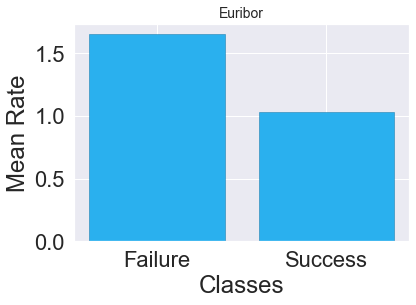

In [18]:
plt.bar(['Failure', 'Success'], [data[data.poutcome=='failure'].euribor3m.mean(), data[data.poutcome=='success'].euribor3m.mean()], \
        facecolor = '#2ab0ee', edgecolor='#167aaa', linewidth=0.5)
plt.title('Euribor', fontsize=14)
plt.xlabel('Classes')
plt.ylabel('Mean Rate')
plt.show()

In [19]:
data[data.y==1].euribor3m.mean(), data[data.y==0].euribor3m.mean()

(2.1454478935698447, 3.8028263358778625)

# Job distribution

In [20]:
data['job'].unique()

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)

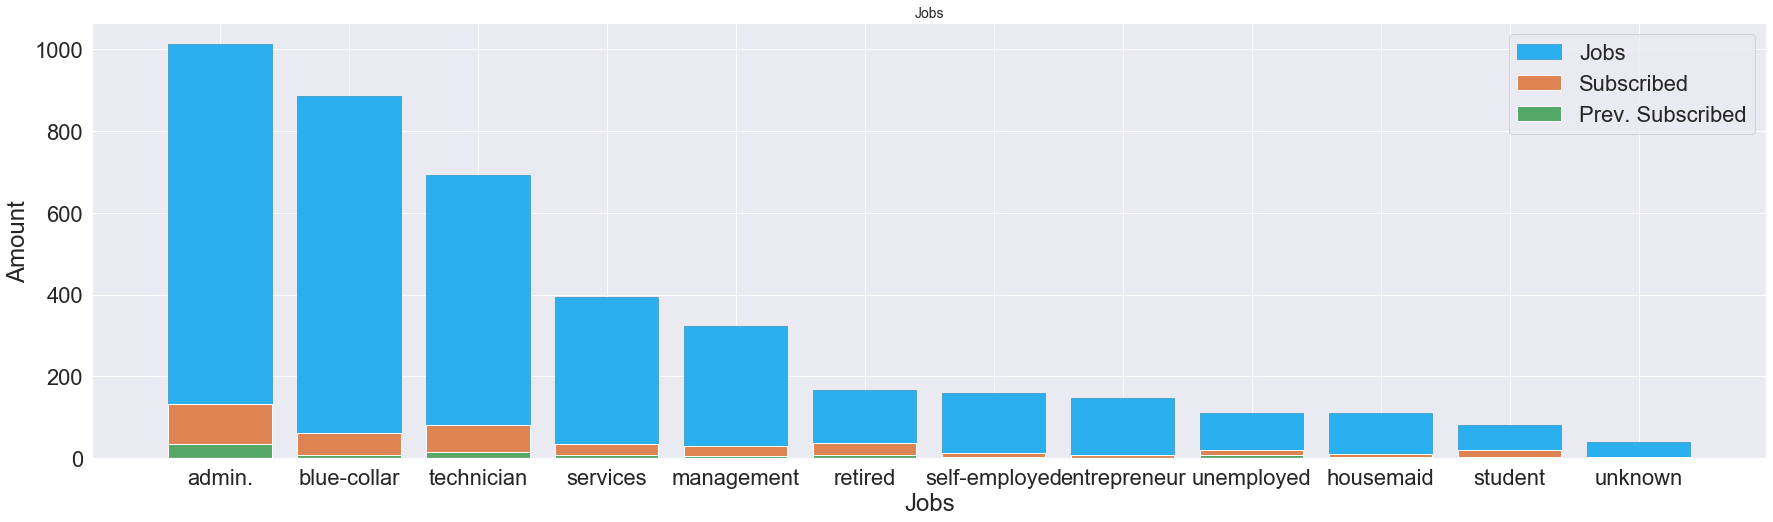

In [21]:
plt.figure(figsize=(30,8))
plt.bar(data.job.value_counts().keys(), data.job.value_counts().values, label='Jobs', facecolor = '#2ab0ee', edgecolor='#167aaa', linewidth=0.5)
plt.bar(data.job.value_counts().keys(), [data[data.job==i].y.sum() for i in data.job.value_counts().keys()], label='Subscribed')
plt.bar(data.job.value_counts().keys(), [data[(data.poutcome=='success') & (data.job==i)].y.sum() for i in data.job.value_counts().keys()], label='Prev. Subscribed')
plt.title('Jobs', fontsize=14)
plt.xlabel('Jobs')
plt.ylabel('Amount')
plt.legend()
plt.show()

# Education Distribution

In [22]:
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

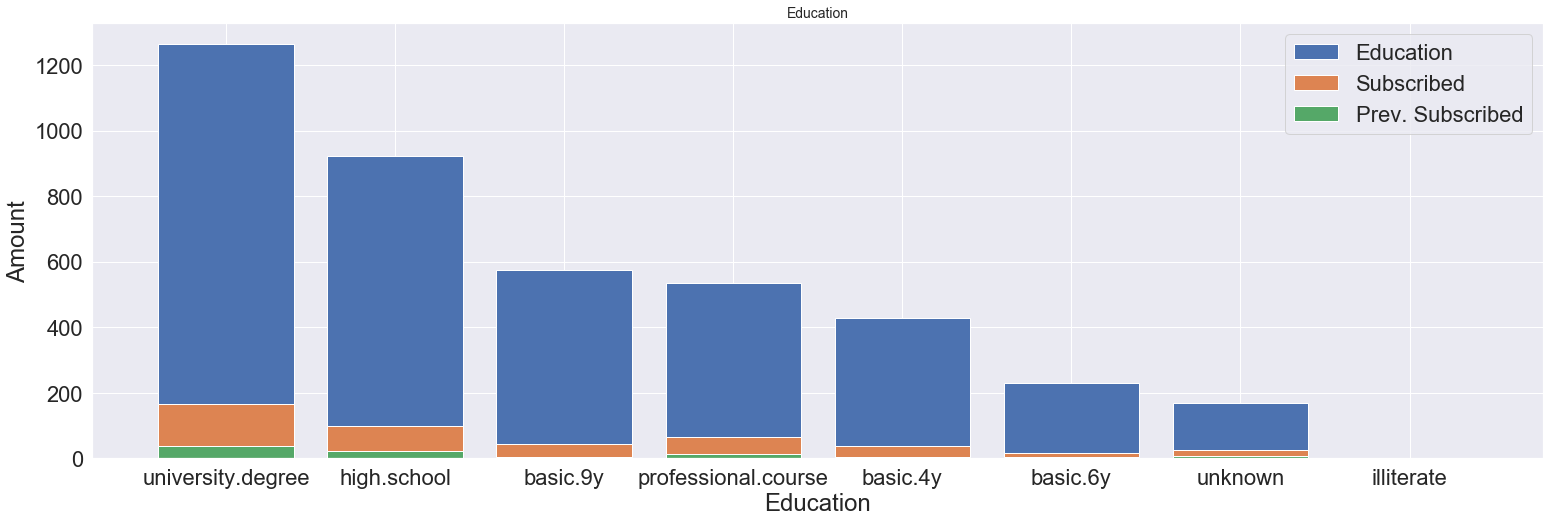

In [23]:
plt.figure(figsize=(26,8))
plt.bar(data.education.value_counts().keys(), data.education.value_counts().values, label='Education')
plt.bar(data.education.value_counts().keys(), [data[data.education==i].y.sum() for i in data.education.value_counts().keys()], label='Subscribed')
plt.bar(data.education.value_counts().keys(), [data[(data.poutcome=='success')&(data.education==i)].y.sum() for i in data.education.value_counts().keys()], label='Prev. Subscribed')
plt.title('Education', fontsize=14)
plt.xlabel('Education')
plt.ylabel('Amount')
plt.legend()
plt.show()

# Marital Status Distribution


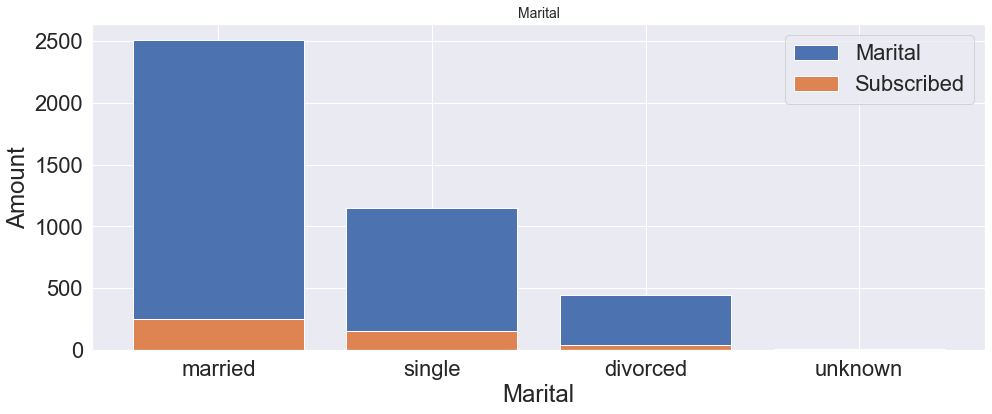

In [24]:
plt.figure(figsize=(16,6))
plt.bar(data.marital.value_counts().keys(), data.marital.value_counts().values, label='Marital')
plt.bar(data.marital.value_counts().keys(), [data[data.marital==i].y.sum() for i in data.marital.value_counts().keys()], label='Subscribed')
plt.title('Marital', fontsize=14)
plt.xlabel('Marital')
plt.ylabel('Amount')
plt.legend()
plt.show()

# Cellphone or Landline?

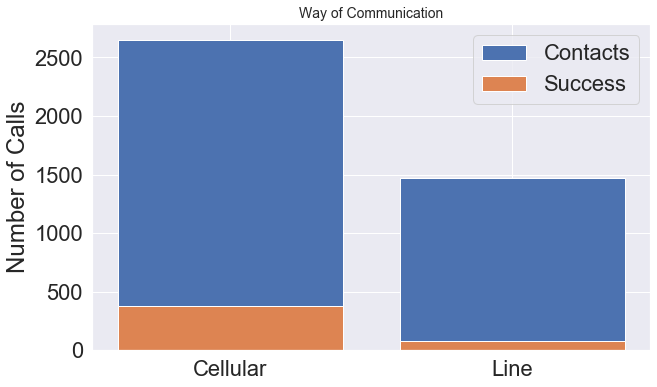

In [25]:
plt.figure(figsize=(10,6))
plt.bar(['Cellular', 'Line'], [data.contact.value_counts()[0], data.contact.value_counts()[1]], label='Contacts')
plt.bar(['Cellular', 'Line'], [sum(data[(data.contact=='cellular') & (data.y==1)].y), sum(data[(data.contact=='telephone') & (data.y==1)].y)], label='Success')
plt.title('Way of Communication', fontsize=14)
plt.ylabel('Number of Calls')
plt.legend()
plt.show()

# Age Distribution

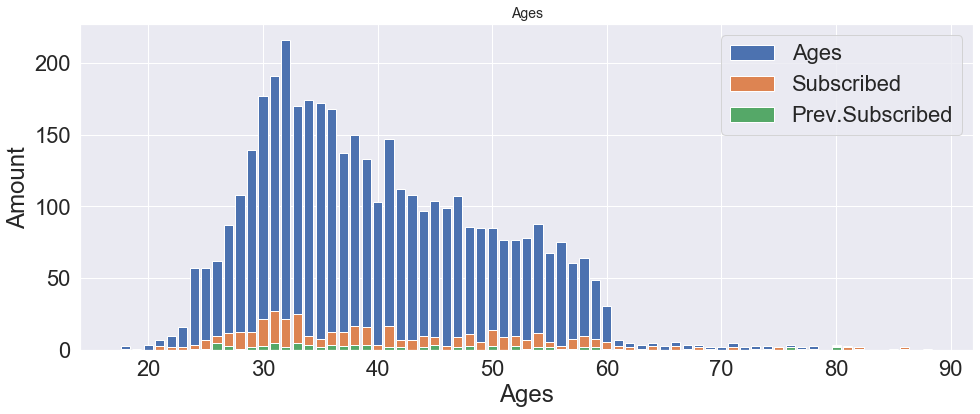

In [26]:
plt.figure(figsize=(16,6))
plt.bar(data.groupby('age').y.sum().keys(), [sum(data.age==i) for i in data.groupby('age').y.sum().keys()], label='Ages')
plt.bar(data.groupby('age').y.sum().keys(), [data[data.age==i].y.sum() for i in data.groupby('age').y.sum().keys()], label='Subscribed')
plt.bar(data.groupby('age').y.sum().keys(), [data[(data.poutcome=='success')&(data.age==i)].y.sum() for i in data.groupby('age').y.sum().keys()], label='Prev.Subscribed')
plt.title('Ages', fontsize=14)
plt.xlabel('Ages')
plt.ylabel('Amount')
plt.legend()
plt.show()


In [27]:
before_60 = round((data[data.age < 60].y.sum()/sum(data.age < 60))*100, 2)
after_60 = round((data[data.age > 60].y.sum()/sum(data.age > 60))*100, 2)

print('Before 60: {}% subscribed\nAfter 60: {}% subscribed'.format(before_60, after_60))

Before 60: 10.23% subscribed
After 60: 44.3% subscribed


There is an evidence that clients who are over 60 years old are more willing to subscribe to the term deposit.

# Distribution of contacts made each month of the campaign

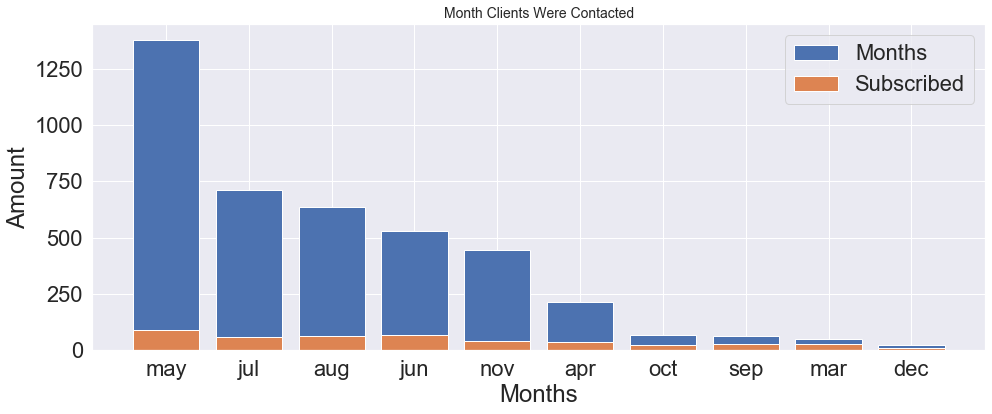

In [28]:
plt.figure(figsize=(16,6))
plt.bar(data.month.value_counts().keys(), data.month.value_counts().values, label='Months')
plt.bar(data.month.value_counts().keys(), [data[data.month==i].y.sum() for i in data.month.value_counts().keys()], label='Subscribed')
plt.title('Month Clients Were Contacted', fontsize=14)
plt.xlabel('Months')
plt.ylabel('Amount')
plt.legend()
plt.show()

It appears that most clients were contacted during month of may.

# Number of contacts performed during recent campaign to each client¶


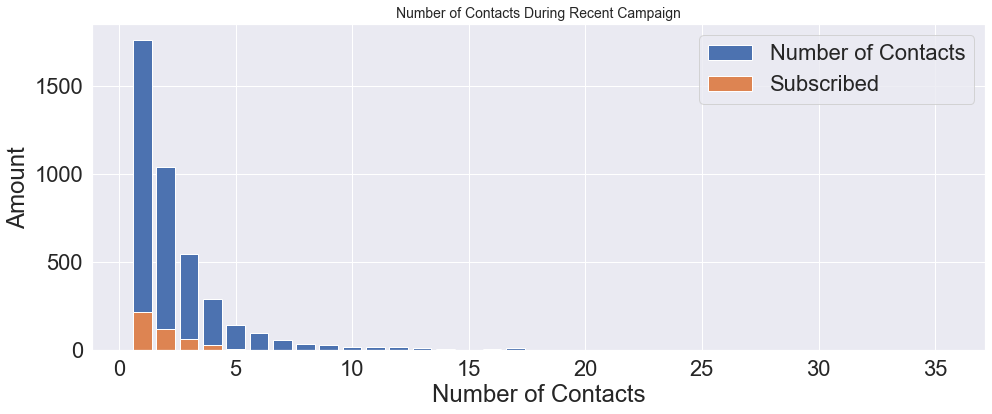

In [29]:
plt.figure(figsize=(16,6))
plt.bar(data.campaign.value_counts().keys(), data.campaign.value_counts().values, label='Number of Contacts')
plt.bar(data.campaign.value_counts().keys(), [data[data.campaign==i].y.sum() for i in data.campaign.value_counts().keys()], label='Subscribed')
plt.title('Number of Contacts During Recent Campaign', fontsize=14)
plt.xlabel('Number of Contacts')
plt.ylabel('Amount')
plt.legend()
plt.show()


# Missing Values

There are several missing values in some categorical attributes(job,education,loan,contact,poutcome), all coded with the “unknown” label. These missing values can be treated as a possible class label or by using deletion/imputation techniques. For this analysis, I will use them as class labels to help draw more insight and predict the outcome.


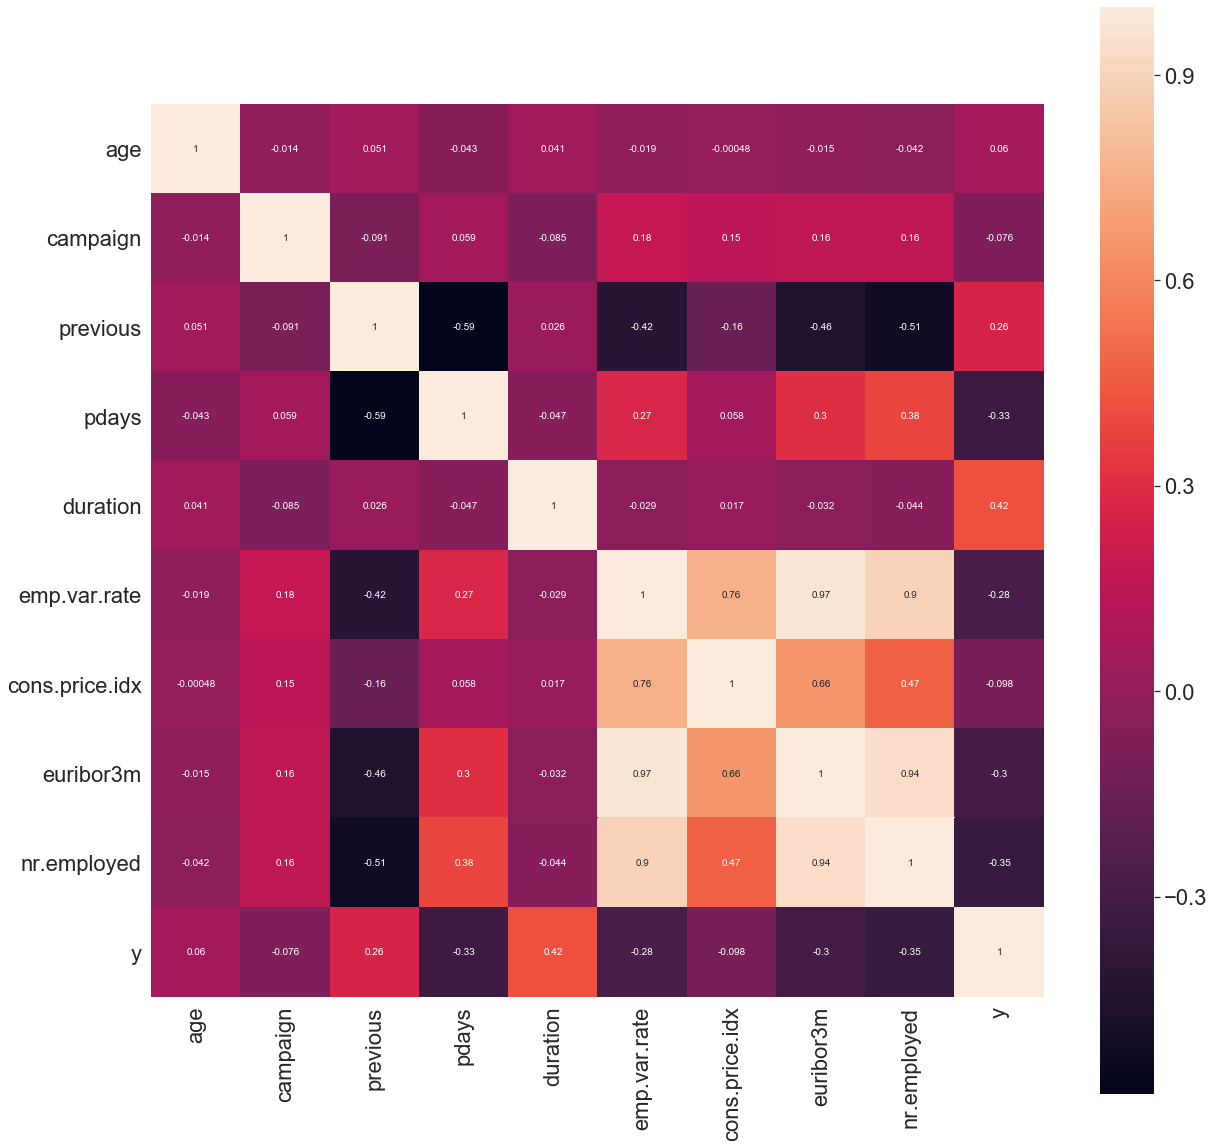

In [30]:
corr_data = data[['age','loan','default','campaign','previous','pdays','duration','emp.var.rate','cons.price.idx','euribor3m','nr.employed','y']].copy()

import seaborn as sns
fig = plt.subplots(figsize = (20,20))
sns.set(font_scale=2.0)
sns.heatmap(corr_data.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

# Preprocessing

# Dealing with Categorical values

In [31]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [32]:
data = pd.get_dummies(data, columns=['housing','loan','job','marital', \
                                     'education','contact','month','day_of_week','poutcome','default'])

In [33]:
data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,default_no,default_unknown,default_yes
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,0,0,0,1,0,1,0,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,0,0,0,1,0,1,0,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,1,0,1,0,1,0,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,0,0,0,1,0,1,0,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,1,0,0,0,0,1,0,1,0,0
5,32,128,3,999,2,-1.1,94.199,-37.5,0.884,4963.6,...,0,1,0,0,1,0,0,1,0,0
6,32,290,4,999,0,-1.1,94.199,-37.5,0.879,4963.6,...,1,0,0,0,0,1,0,1,0,0
7,41,44,2,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,1,0,0,0,0,1,0,0,1,0
8,31,68,1,999,1,-0.1,93.200,-42.0,4.153,5195.8,...,0,0,1,0,1,0,0,1,0,0
9,35,170,1,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,1,0,0,0,1,0,0,1,0


In [34]:
data.shape

(4119, 64)

# Separating features and target variable

In [35]:
X = data.drop(['y','duration'], axis=1)
y = data.y

In [36]:
X.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,housing_no,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,default_no,default_unknown,default_yes
0,30,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,0,...,0,0,0,0,0,1,0,1,0,0
1,39,4,999,0,1.1,93.994,-36.4,4.855,5191.0,1,...,0,0,0,0,0,1,0,1,0,0
2,25,1,999,0,1.4,94.465,-41.8,4.962,5228.1,0,...,0,0,0,1,0,1,0,1,0,0
3,38,3,999,0,1.4,94.465,-41.8,4.959,5228.1,0,...,0,0,0,0,0,1,0,1,0,0
4,47,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,0,...,1,0,0,0,0,1,0,1,0,0


# Splitting data into train and test

In [37]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit


# We are using Stratified Shuffle split due to the high imbalance in the target variable

In [38]:
#step1 : stratified shuffle split

rs = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
rs.get_n_splits(X,y)
for train_index, test_index in rs.split(X,y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train_org,X_test_org = X.iloc[train_index], X.iloc[test_index]
        y_train,y_test = y.iloc[train_index], y.iloc[test_index]
        
       
        

TRAIN: [2617 3794  225 ... 3000 3459 1247] TEST: [ 914 3019  244 1036 3517  263 1926 2874 2619 1644 3287 1832  892 3279
 3085  261 2428 3192 3269 4090 1989  309 2328 1789 2996 1691  674 3826
 2974 2103 4005  973  986 2708 1750  129 1479 3422 2399 1498 2849 2266
 3374 3895  501 3519 3376 2451  728 2139 1646 2482 1168 1637 1279 1055
 1009 2344  852 1004 2439 3591  838 2624 4072 1280 3113 3091 2249 4064
 3342  956 2174 2576 3886 2091  446 3586  425  405 2404 2717 2770  599
 2716 1494 1561 3352 1270 2461 3627 1946  174 2990 2303 3108 1089 2684
  172 1329  888 1126 1340  324 1981  680 3901 1742  744  307   23  183
 1450 2292 3778 3504  707 1131 2232   29 1866 1496 4104 1982 2376 1891
 2358 3212 3761 4065 3270 1746 3197 2675  318 3775 1709 3870  148 2410
 1236 2199 3214  413 2213 3893 2975 1616 2372 1647 1337 1258 3818 3180
 2680 3688 3182 3922 1720  896  639 4080  167 3756 1748  820 1338  226
 3467  515  499 2165  451 2057 3378 3311 1064 3092  567  361  779  923
 3924 1084 2736 2806 2860 16

# Scaling and justification of type of scaling used

The scaling method we are using is the Standard Scaler. Since a majority of the values in each column are very small,the data would unnecessarily be skewed if we use min-max scaling and so, we decide to use Standard Scaling.

In [39]:
#step 2: scale
scaler = StandardScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [40]:
X_test

array([[ 0.09104305,  0.55887628,  0.19272083, ...,  0.48286508,
        -0.48286508,  0.        ],
       [ 1.26477703,  0.55887628,  0.19272083, ..., -2.07097189,
         2.07097189,  0.        ],
       [ 0.18885421, -0.20937459,  0.19272083, ...,  0.48286508,
        -0.48286508,  0.        ],
       ...,
       [ 0.09104305, -0.20937459,  0.19272083, ...,  0.48286508,
        -0.48286508,  0.        ],
       [ 1.65602169, -0.20937459,  0.19272083, ...,  0.48286508,
        -0.48286508,  0.        ],
       [ 0.7757212 , -0.20937459,  0.19272083, ...,  0.48286508,
        -0.48286508,  0.        ]])

# Classification models

In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

In [42]:
# DataFrame to store results
#testing = pd.DataFrame(columns = ["Classifier", "F1-Score", "AUC", "Accuracy"])

# KNN Classification

In [43]:
from sklearn.neighbors import KNeighborsClassifier
train_score = []
test_score = []

for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

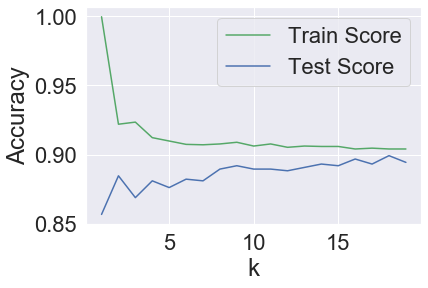

In [44]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [45]:
knn = KNeighborsClassifier(6)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.9074
Test score: 0.8823


In [46]:
from sklearn.neighbors import KNeighborsClassifier
kfold =KFold(n_splits=5, random_state=0)

param_grid={'n_neighbors':range(1,10)}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=kfold, return_train_score=True)
grid_search.fit(X_train,y_train)

test=cross_val_score(grid_search, X_test, y_test, cv=kfold).mean()

In [47]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.8992412746585736
Test 0.8931633407243164
parameters {'n_neighbors': 6}


In [48]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

confusion = confusion_matrix(y_test, grid_search.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, grid_search.predict(X_test), target_names=["0", "1"]))

Confusion matrix:
[[712  22]
 [ 75  15]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       734
           1       0.41      0.17      0.24        90

    accuracy                           0.88       824
   macro avg       0.66      0.57      0.59       824
weighted avg       0.85      0.88      0.86       824



In [49]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
accuracy

0.8822815533980582

In [50]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test, grid_search.predict(X_test))
recall

0.16666666666666666

In [51]:
precision = precision_score(y_test, grid_search.predict(X_test))
precision

0.40540540540540543

In [52]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

0.23622047244094488

In [53]:
auc = roc_auc_score(y_test, grid_search.predict(X_test))

In [54]:
model_results = pd.DataFrame(columns=('S.No','Model_Name','Parameters', 'Train_Score', 'Test_Score','Accuracy','precision','recall','f1','AUC'))

In [55]:
model_results.loc[len(model_results)]=[1,'K-neighbors',grid_search.best_params_,grid_search.best_score_,test, accuracy, precision, recall, f1, auc]
model_results

,S.No,Model_Name,Parameters,Train_Score,Test_Score,Accuracy,precision,recall,f1,AUC
0,1,K-neighbors,{'n_neighbors': 6},0.899241,0.893163,0.882282,0.405405,0.166667,0.23622,0.568347


# Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
kfold =KFold(n_splits=5, random_state=0)

param_grid={'penalty':['l1','l2'],'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=kfold, return_train_score=True)
grid_search.fit(X_train,y_train)

k_test=cross_val_score(grid_search, X_test, y_test, cv=kfold).mean()

In [57]:
print("Train:",grid_search.best_score_)
print("Test",k_test)
print("parameters",grid_search.best_params_)

Train: 0.9031866464339909
Test 0.8968144863266815
parameters {'C': 0.1, 'penalty': 'l1'}


In [58]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, grid_search.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, grid_search.predict(X_test), target_names=["0", "1"]))

Confusion matrix:
[[717  17]
 [ 69  21]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       734
           1       0.55      0.23      0.33        90

    accuracy                           0.90       824
   macro avg       0.73      0.61      0.64       824
weighted avg       0.87      0.90      0.88       824



In [59]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
accuracy

0.8956310679611651

In [60]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test, grid_search.predict(X_test))
recall

0.23333333333333334

In [61]:
precision = precision_score(y_test,grid_search.predict(X_test))
precision

0.5526315789473685

In [62]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

0.32812500000000006

In [63]:
auc = roc_auc_score(y_test, grid_search.predict(X_test))
auc

0.6050862851952771

In [64]:
model_results.loc[len(model_results)]=[2,'Logistic Regression',grid_search.best_params_, grid_search.best_score_,test, accuracy, precision, recall, f1, auc]
model_results

,S.No,Model_Name,Parameters,Train_Score,Test_Score,Accuracy,precision,recall,f1,AUC
0,1,K-neighbors,{'n_neighbors': 6},0.899241,0.893163,0.882282,0.405405,0.166667,0.236220,0.568347
1,2,Logistic Regression,"{'C': 0.1, 'penalty': 'l1'}",0.903187,0.893163,0.895631,0.552632,0.233333,0.328125,0.605086


# Linear SVC

In [65]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 10, 0.1, 1, 100]}
grid_search = GridSearchCV(LinearSVC(),param_grid, cv=kfold, return_train_score=True);

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5).mean();

In [66]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.9028831562974203
Test 0.8883370288248338
parameters {'C': 1}


In [67]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, grid_search.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, grid_search.predict(X_test), target_names=["0", "1"]))

Confusion matrix:
[[717  17]
 [ 70  20]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       734
           1       0.54      0.22      0.31        90

    accuracy                           0.89       824
   macro avg       0.73      0.60      0.63       824
weighted avg       0.87      0.89      0.87       824



In [68]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,grid_search.predict(X_test))
accuracy

0.8944174757281553

In [69]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test, grid_search.predict(X_test))
recall

0.2222222222222222

In [70]:
precision =precision_score(y_test, grid_search.predict(X_test))
precision

0.5405405405405406

In [71]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

0.31496062992125984

In [72]:
auc = roc_auc_score(y_test, grid_search.predict(X_test))
auc

0.5995307296397215

In [73]:
model_results.loc[len(model_results)]=[3,'Linear SVC',grid_search.best_params_,grid_search.best_score_,test, accuracy, precision, recall, f1, auc]
model_results

,S.No,Model_Name,Parameters,Train_Score,Test_Score,Accuracy,precision,recall,f1,AUC
0,1,K-neighbors,{'n_neighbors': 6},0.899241,0.893163,0.882282,0.405405,0.166667,0.236220,0.568347
1,2,Logistic Regression,"{'C': 0.1, 'penalty': 'l1'}",0.903187,0.893163,0.895631,0.552632,0.233333,0.328125,0.605086
2,3,Linear SVC,{'C': 1},0.902883,0.888337,0.894417,0.540541,0.222222,0.314961,0.599531


# Linear SVC - Kernel Trick

In [74]:
from sklearn.svm import SVC

param_grid = {'C': [0.01, 0.1, 1]}
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=kfold, return_train_score=True);

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5).mean();

In [75]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.9010622154779969
Test 0.8992535107169253
parameters {'C': 0.01}


In [76]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, grid_search.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, grid_search.predict(X_test), target_names=["0", "1"]))

Confusion matrix:
[[715  19]
 [ 67  23]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       734
           1       0.55      0.26      0.35        90

    accuracy                           0.90       824
   macro avg       0.73      0.61      0.65       824
weighted avg       0.87      0.90      0.88       824



In [77]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
accuracy

0.8956310679611651

In [78]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test, grid_search.predict(X_test))
recall

0.25555555555555554

In [79]:
precision = precision_score(y_test, grid_search.predict(X_test))
precision

0.5476190476190477

In [80]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

0.3484848484848485

In [81]:
auc = roc_auc_score(y_test, grid_search.predict(X_test))
auc

0.6148349984862247

In [82]:
model_results.loc[len(model_results)]=[4,'LinearSVC-Kernel',grid_search.best_params_,grid_search.best_score_,test, accuracy, precision, recall, f1, auc]
model_results

,S.No,Model_Name,Parameters,Train_Score,Test_Score,Accuracy,precision,recall,f1,AUC
0,1,K-neighbors,{'n_neighbors': 6},0.899241,0.893163,0.882282,0.405405,0.166667,0.236220,0.568347
1,2,Logistic Regression,"{'C': 0.1, 'penalty': 'l1'}",0.903187,0.893163,0.895631,0.552632,0.233333,0.328125,0.605086
2,3,Linear SVC,{'C': 1},0.902883,0.888337,0.894417,0.540541,0.222222,0.314961,0.599531
3,4,LinearSVC-Kernel,{'C': 0.01},0.901062,0.899254,0.895631,0.547619,0.255556,0.348485,0.614835


# SVC- RBF Kernel¶

In [83]:
from sklearn.svm import SVC

param_grid = {'C': [0.01, 0.1, 10, 1],'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, return_train_score=True);

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5).mean();

In [84]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.9019726858877086
Test 0.8968218773096822
parameters {'C': 1, 'gamma': 0.01}


In [85]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, grid_search.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, grid_search.predict(X_test), target_names=["0", "1"]))

Confusion matrix:
[[720  14]
 [ 70  20]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       734
           1       0.59      0.22      0.32        90

    accuracy                           0.90       824
   macro avg       0.75      0.60      0.63       824
weighted avg       0.88      0.90      0.88       824



In [86]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
accuracy

0.8980582524271845

In [87]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test, grid_search.predict(X_test))
recall

0.2222222222222222

In [88]:
precision = precision_score(y_test, grid_search.predict(X_test))
precision

0.5882352941176471

In [89]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

0.3225806451612903

In [90]:
auc = roc_auc_score(y_test, grid_search.predict(X_test))
auc

0.6015743263699668

In [91]:
model_results.loc[len(model_results)]=[5,'LinearSVC-RBF',grid_search.best_params_,grid_search.best_score_,test, accuracy, precision, recall, f1, auc]
model_results

,S.No,Model_Name,Parameters,Train_Score,Test_Score,Accuracy,precision,recall,f1,AUC
0,1,K-neighbors,{'n_neighbors': 6},0.899241,0.893163,0.882282,0.405405,0.166667,0.236220,0.568347
1,2,Logistic Regression,"{'C': 0.1, 'penalty': 'l1'}",0.903187,0.893163,0.895631,0.552632,0.233333,0.328125,0.605086
2,3,Linear SVC,{'C': 1},0.902883,0.888337,0.894417,0.540541,0.222222,0.314961,0.599531
3,4,LinearSVC-Kernel,{'C': 0.01},0.901062,0.899254,0.895631,0.547619,0.255556,0.348485,0.614835
4,5,LinearSVC-RBF,"{'C': 1, 'gamma': 0.01}",0.901973,0.896822,0.898058,0.588235,0.222222,0.322581,0.601574


# Decision Tree Classifier

In [92]:
from sklearn.tree import DecisionTreeClassifier

param_grid ={'max_depth': [1,2,3,4,5,6,7,8,9,10], }
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, return_train_score = True);

grid_search.fit(X_train, y_train)

test = cross_val_score(grid_search, X_test, y_test, cv = 5).mean();

In [93]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.903793626707132
Test 0.8871175166297117
parameters {'max_depth': 2}


In [94]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, grid_search.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, grid_search.predict(X_test), target_names=["0", "1"]))

Confusion matrix:
[[716  18]
 [ 68  22]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       734
           1       0.55      0.24      0.34        90

    accuracy                           0.90       824
   macro avg       0.73      0.61      0.64       824
weighted avg       0.87      0.90      0.88       824



In [95]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
accuracy

0.8956310679611651

In [96]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test, grid_search.predict(X_test))
recall

0.24444444444444444

In [97]:
precision = precision_score(y_test, grid_search.predict(X_test))
precision

0.55

In [98]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

0.3384615384615384

In [99]:
auc = roc_auc_score(y_test, grid_search.predict(X_test))
auc

0.6099606418407508

In [100]:
model_results.loc[len(model_results)]=[6,'Decision tree',grid_search.best_params_,grid_search.best_score_,test, accuracy, precision, recall, f1, auc]
model_results

,S.No,Model_Name,Parameters,Train_Score,Test_Score,Accuracy,precision,recall,f1,AUC
0,1,K-neighbors,{'n_neighbors': 6},0.899241,0.893163,0.882282,0.405405,0.166667,0.236220,0.568347
1,2,Logistic Regression,"{'C': 0.1, 'penalty': 'l1'}",0.903187,0.893163,0.895631,0.552632,0.233333,0.328125,0.605086
2,3,Linear SVC,{'C': 1},0.902883,0.888337,0.894417,0.540541,0.222222,0.314961,0.599531
3,4,LinearSVC-Kernel,{'C': 0.01},0.901062,0.899254,0.895631,0.547619,0.255556,0.348485,0.614835
4,5,LinearSVC-RBF,"{'C': 1, 'gamma': 0.01}",0.901973,0.896822,0.898058,0.588235,0.222222,0.322581,0.601574
5,6,Decision tree,{'max_depth': 2},0.903794,0.887118,0.895631,0.550000,0.244444,0.338462,0.609961


# Classification Task:
1.Apply two voting classifiers - one with hard voting and one with soft voting
2.Apply any two models with bagging and any two models with pasting.
3.Apply any two models with AdaBoost boosting
4.Apply one model with gradient boosting
5.Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare a similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
6.Apply deep learning models covered in class

# Soft Voting Classifier

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [102]:
knn_clf = KNeighborsClassifier(6)
knn_clf.fit(X_train, y_train)
log_clf = LogisticRegression(C = 0.1, penalty = 'l1')
log_clf.fit(X_train, y_train)
svm_clf = LinearSVC(C = 1)
svm_clf.fit(X_train, y_train)
svmk_clf = SVC(kernel = 'linear',C = 0.01, probability = True)
svmk_clf.fit(X_train, y_train)
svmrbf_clf = SVC(kernel='rbf', C = 1, gamma = 0.01, probability = True)
svmrbf_clf.fit(X_train,y_train)
t_clf = DecisionTreeClassifier(max_depth =2)
t_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('knn', knn_clf),('lr', log_clf), ('svc_k', svmk_clf),('svc_rbf', svmrbf_clf),('tree', t_clf)], voting='soft')
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=6,
                                                   p=2, weights='uniform')),
                             ('lr',
                              LogisticRegression(C=0.1, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l1',
                                              

In [103]:
from sklearn.metrics import accuracy_score
for clf in (knn_clf, log_clf,svm_clf,svmk_clf, svmrbf_clf, t_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.8822815533980582
LogisticRegression 0.8956310679611651
LinearSVC 0.8944174757281553
SVC 0.8956310679611651
SVC 0.8980582524271845
DecisionTreeClassifier 0.8956310679611651
VotingClassifier 0.8968446601941747


In [104]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, clf.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, clf.predict(X_test), target_names=["0", "1"]))

Confusion matrix:
[[719  15]
 [ 70  20]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       734
           1       0.57      0.22      0.32        90

    accuracy                           0.90       824
   macro avg       0.74      0.60      0.63       824
weighted avg       0.87      0.90      0.88       824



In [105]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, clf.predict(X_test))
accuracy

0.8968446601941747

In [106]:
recall = recall_score(y_test, clf.predict(X_test))
recall

0.2222222222222222

In [107]:
precision = precision_score(y_test, clf.predict(X_test))
precision

0.5714285714285714

In [108]:
f1 = f1_score(y_test, clf.predict(X_test))
f1

0.32

In [109]:
auc = roc_auc_score(y_test, clf.predict(X_test))
auc

0.600893127459885

In [110]:
voting_results = pd.DataFrame(columns=('S.No','model_name','Accuracy','precision','recall', 'f1', 'AUC'))

In [111]:
voting_results.loc[len(voting_results)]=[1,'Soft Voting',accuracy, precision, recall, f1, auc]
voting_results

,S.No,model_name,Accuracy,precision,recall,f1,AUC
0,1,Soft Voting,0.896845,0.571429,0.222222,0.32,0.600893


Accuracy is the same . does not improve with soft voting.

# Hard Voting Classifier

In [112]:
knn_clf = KNeighborsClassifier(6)
knn_clf.fit(X_train, y_train)
log_clf = LogisticRegression(C = 0.1, penalty = 'l1')
log_clf.fit(X_train, y_train)
svm_clf = LinearSVC(C = 1)
svm_clf.fit(X_train, y_train)
svmk_clf = SVC(kernel = 'linear', C = 0.01, )
svmk_clf.fit(X_train, y_train)
svmrbf_clf = SVC(kernel='rbf', C = 1, gamma = 0.01)
svmrbf_clf.fit(X_train,y_train)
t_clf = DecisionTreeClassifier(max_depth = 2)
t_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf), ('svckernel', svmk_clf),('svcrbf', svmrbf_clf) , ('tree', t_clf)], voting='hard')
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.1, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l1',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                 

In [113]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, svmk_clf, svmrbf_clf, t_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8956310679611651
KNeighborsClassifier 0.8822815533980582
LinearSVC 0.8968446601941747
SVC 0.8956310679611651
SVC 0.8980582524271845
DecisionTreeClassifier 0.8956310679611651
VotingClassifier 0.8944174757281553


In [114]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, clf.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, clf.predict(X_test), target_names=["0", "1"]))

Confusion matrix:
[[718  16]
 [ 71  19]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       734
           1       0.54      0.21      0.30        90

    accuracy                           0.89       824
   macro avg       0.73      0.59      0.62       824
weighted avg       0.87      0.89      0.87       824



In [115]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, clf.predict(X_test))
accuracy

0.8944174757281553

In [116]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test, clf.predict(X_test))
recall

0.2111111111111111

In [117]:
precision = precision_score(y_test, clf.predict(X_test))
precision

0.5428571428571428

In [118]:
f1 = f1_score(y_test, clf.predict(X_test))
f1

0.304

In [119]:
auc = roc_auc_score(y_test, clf.predict(X_test))
auc

0.5946563729942476

In [120]:
voting_results.loc[len(voting_results)]=[2,'Hard Voting',accuracy, precision, recall, f1, auc]
voting_results

,S.No,model_name,Accuracy,precision,recall,f1,AUC
0,1,Soft Voting,0.896845,0.571429,0.222222,0.320,0.600893
1,2,Hard Voting,0.894417,0.542857,0.211111,0.304,0.594656


# Bagging with Svm-kernel

In [121]:
from sklearn.ensemble import BaggingClassifier

In [122]:
param_grid = {'n_estimators': [100,200,300],'max_samples':[1,10,100]}
grid_search = GridSearchCV(BaggingClassifier(svmk_clf), param_grid, cv=5, return_train_score=True);
grid_search.fit(X_train, y_train)
test=cross_val_score(grid_search,X_test, y_test,cv=5).mean();

In [123]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.8955993930197269
Test 0.8920029563932003
parameters {'max_samples': 100, 'n_estimators': 100}


In [124]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, grid_search.predict(X_test))
confusion

array([[734,   0],
       [ 88,   2]], dtype=int64)

In [125]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
accuracy

0.8932038834951457

In [126]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test, grid_search.predict(X_test))
recall

0.022222222222222223

In [127]:
precision = precision_score(y_test, grid_search.predict(X_test))
precision

1.0

In [128]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

0.04347826086956522

In [129]:
auc = roc_auc_score(y_test, grid_search.predict(X_test))
auc

0.5111111111111111

In [130]:
ensemble_results = pd.DataFrame(columns=('S.No','Model_Name','Parameters', 'Train_Score', 'Test_Score','Accuracy','precision','recall','f1','AUC'))

In [131]:
ensemble_results.loc[len(ensemble_results)]=[1,'Bagging with SVM-kernel',grid_search.best_params_,grid_search.best_score_,test, accuracy, precision, recall, f1, auc]
ensemble_results

,S.No,Model_Name,Parameters,Train_Score,Test_Score,Accuracy,precision,recall,f1,AUC
0,1,Bagging with SVM-kernel,"{'max_samples': 100, 'n_estimators': 100}",0.895599,0.892003,0.893204,1.0,0.022222,0.043478,0.511111


With Bagging train score is slightly reduced for svn-kernel. AUC is reduced with bagging

# Bagging with Decision tree

In [132]:
param_grid = {'n_estimators': [100,200,300,400,500],'max_samples':[1,10,100]}
grid_search = GridSearchCV(BaggingClassifier(t_clf), param_grid, cv=5, return_train_score=True);
grid_search.fit(X_train, y_train)
test=cross_val_score(grid_search,X_test, y_test,cv=5).mean();

In [133]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.9022761760242792
Test 0.8919881744271988
parameters {'max_samples': 100, 'n_estimators': 300}


In [134]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, grid_search.predict(X_test))
confusion

array([[723,  11],
       [ 74,  16]], dtype=int64)

In [135]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
accuracy

0.8968446601941747

In [136]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test, grid_search.predict(X_test))
recall

0.17777777777777778

In [137]:
precision = precision_score(y_test, grid_search.predict(X_test))
precision

0.5925925925925926

In [138]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

0.2735042735042735

In [139]:
auc = roc_auc_score(y_test, grid_search.predict(X_test))
auc

0.5813957008779898

In [140]:
ensemble_results.loc[len(ensemble_results)]=[2,'Bagging with Decision Tree',grid_search.best_params_,grid_search.best_score_,test, accuracy, precision, recall, f1, auc]
ensemble_results

,S.No,Model_Name,Parameters,Train_Score,Test_Score,Accuracy,precision,recall,f1,AUC
0,1,Bagging with SVM-kernel,"{'max_samples': 100, 'n_estimators': 100}",0.895599,0.892003,0.893204,1.000000,0.022222,0.043478,0.511111
1,2,Bagging with Decision Tree,"{'max_samples': 100, 'n_estimators': 300}",0.902276,0.891988,0.896845,0.592593,0.177778,0.273504,0.581396


AUC is reduced with bagging decision tree.test score slightly increased

In [141]:
bag_clf = BaggingClassifier(t_clf, n_estimators =400, max_samples = 100)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=2,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

# Pasting with SVM-kernel 

In [142]:
param_grid = {'n_estimators': [100,200,300,400,500],'max_samples':[1,10,100]}
grid_search = GridSearchCV(BaggingClassifier(svmk_clf), param_grid, cv=5, return_train_score=True);
grid_search.fit(X_train, y_train)
test=cross_val_score(grid_search,X_test, y_test,cv=5).mean();

In [143]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.8949924127465857
Test 0.8907834441980784
parameters {'max_samples': 100, 'n_estimators': 400}


In [144]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, grid_search.predict(X_test))
confusion

array([[734,   0],
       [ 88,   2]], dtype=int64)

In [145]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
accuracy

0.8932038834951457

In [146]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test, grid_search.predict(X_test))
recall

0.022222222222222223

In [147]:
precision = precision_score(y_test, grid_search.predict(X_test))
precision

1.0

In [148]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

0.04347826086956522

In [149]:
auc = roc_auc_score(y_test, grid_search.predict(X_test))
auc

0.5111111111111111

In [150]:
ensemble_results.loc[len(ensemble_results)]=[3,'Pasting with SVM-Kernel',grid_search.best_params_,grid_search.best_score_,test, accuracy, precision, recall, f1, auc]
ensemble_results

,S.No,Model_Name,Parameters,Train_Score,Test_Score,Accuracy,precision,recall,f1,AUC
0,1,Bagging with SVM-kernel,"{'max_samples': 100, 'n_estimators': 100}",0.895599,0.892003,0.893204,1.000000,0.022222,0.043478,0.511111
1,2,Bagging with Decision Tree,"{'max_samples': 100, 'n_estimators': 300}",0.902276,0.891988,0.896845,0.592593,0.177778,0.273504,0.581396
2,3,Pasting with SVM-Kernel,"{'max_samples': 100, 'n_estimators': 400}",0.894992,0.890783,0.893204,1.000000,0.022222,0.043478,0.511111


# Pasting with Decision tree

In [151]:
param_grid = {'n_estimators': [100,200,300,400,500],'max_samples':[1,10,100]}
grid_search = GridSearchCV(BaggingClassifier(t_clf), param_grid, cv=5, return_train_score=True);
grid_search.fit(X_train, y_train)
test=cross_val_score(grid_search,X_test, y_test,cv=5).mean();

In [152]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.9016691957511381
Test 0.8944124168514411
parameters {'max_samples': 100, 'n_estimators': 500}


In [153]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, grid_search.predict(X_test))
confusion

array([[727,   7],
       [ 77,  13]], dtype=int64)

In [154]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
accuracy

0.8980582524271845

In [155]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test, grid_search.predict(X_test))
recall

0.14444444444444443

In [156]:
precision = precision_score(y_test, grid_search.predict(X_test))
precision

0.65

In [157]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

0.23636363636363633

In [158]:
auc = roc_auc_score(y_test, grid_search.predict(X_test))
auc

0.56745382985165

In [159]:
ensemble_results.loc[len(ensemble_results)]=[4,'Pasting with Decision tree',grid_search.best_params_,grid_search.best_score_,test, accuracy, precision, recall, f1, auc]
ensemble_results

,S.No,Model_Name,Parameters,Train_Score,Test_Score,Accuracy,precision,recall,f1,AUC
0,1,Bagging with SVM-kernel,"{'max_samples': 100, 'n_estimators': 100}",0.895599,0.892003,0.893204,1.000000,0.022222,0.043478,0.511111
1,2,Bagging with Decision Tree,"{'max_samples': 100, 'n_estimators': 300}",0.902276,0.891988,0.896845,0.592593,0.177778,0.273504,0.581396
2,3,Pasting with SVM-Kernel,"{'max_samples': 100, 'n_estimators': 400}",0.894992,0.890783,0.893204,1.000000,0.022222,0.043478,0.511111
3,4,Pasting with Decision tree,"{'max_samples': 100, 'n_estimators': 500}",0.901669,0.894412,0.898058,0.650000,0.144444,0.236364,0.567454


# ADA Boost with Decision tree

In [160]:
from sklearn.ensemble import AdaBoostClassifier

In [161]:
kfold =KFold(n_splits=5, random_state=0)
param_grid = {'n_estimators': [10, 50, 100],'learning_rate': [0.1, 0.5, 1]}
grid_search = GridSearchCV(AdaBoostClassifier(t_clf, random_state = 0), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
test=cross_val_score(grid_search,X_test, y_test,cv=5).mean()


c:\users\shivani\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [162]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)


Train: 0.903793626707132
Test 0.8883296378418329
parameters {'learning_rate': 0.1, 'n_estimators': 10}


In [163]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, grid_search.predict(X_test))
confusion

array([[720,  14],
       [ 71,  19]], dtype=int64)

In [164]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
accuracy

0.8968446601941747

In [165]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test, grid_search.predict(X_test))
recall

0.2111111111111111

In [166]:
precision = precision_score(y_test, grid_search.predict(X_test))
precision

0.5757575757575758

In [167]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

0.3089430894308943

In [168]:
auc = roc_auc_score(y_test, grid_search.predict(X_test))
auc

0.5960187708144111

In [169]:
ensemble_results.loc[len(ensemble_results)]=[5,'Ada Boost with Decision Tree',grid_search.best_params_,grid_search.best_score_,test, accuracy, precision, recall, f1, auc]
ensemble_results

,S.No,Model_Name,Parameters,Train_Score,Test_Score,Accuracy,precision,recall,f1,AUC
0,1,Bagging with SVM-kernel,"{'max_samples': 100, 'n_estimators': 100}",0.895599,0.892003,0.893204,1.000000,0.022222,0.043478,0.511111
1,2,Bagging with Decision Tree,"{'max_samples': 100, 'n_estimators': 300}",0.902276,0.891988,0.896845,0.592593,0.177778,0.273504,0.581396
2,3,Pasting with SVM-Kernel,"{'max_samples': 100, 'n_estimators': 400}",0.894992,0.890783,0.893204,1.000000,0.022222,0.043478,0.511111
3,4,Pasting with Decision tree,"{'max_samples': 100, 'n_estimators': 500}",0.901669,0.894412,0.898058,0.650000,0.144444,0.236364,0.567454
4,5,Ada Boost with Decision Tree,"{'learning_rate': 0.1, 'n_estimators': 10}",0.903794,0.888330,0.896845,0.575758,0.211111,0.308943,0.596019


# ADA Boost with Logistic

In [170]:
kfold =KFold(n_splits=5, random_state=0)
param_grid = {'n_estimators': [10, 50, 100],'learning_rate': [0.1, 0.5, 1]}
grid_search = GridSearchCV(AdaBoostClassifier(log_clf, random_state = 0), param_grid, cv=kfold, return_train_score=True)
grid_search.fit(X_train, y_train)
test=cross_val_score(grid_search,X_test, y_test,cv=5).mean()


In [171]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)


Train: 0.8904400606980273
Test 0.8907760532150777
parameters {'learning_rate': 0.1, 'n_estimators': 10}


In [172]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, grid_search.predict(X_test))
confusion

array([[734,   0],
       [ 90,   0]], dtype=int64)

In [173]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
accuracy

0.8907766990291263

In [174]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test, grid_search.predict(X_test))
recall

0.0

In [175]:
precision = precision_score(y_test, grid_search.predict(X_test))
precision

0.0

In [176]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

0.0

In [177]:
auc = roc_auc_score(y_test, grid_search.predict(X_test))
auc

0.5

In [178]:
ensemble_results.loc[len(ensemble_results)]=[6,'Ada Boost with Logistic',grid_search.best_params_,grid_search.best_score_,test, accuracy, precision, recall, f1, auc]
ensemble_results

,S.No,Model_Name,Parameters,Train_Score,Test_Score,Accuracy,precision,recall,f1,AUC
0,1,Bagging with SVM-kernel,"{'max_samples': 100, 'n_estimators': 100}",0.895599,0.892003,0.893204,1.000000,0.022222,0.043478,0.511111
1,2,Bagging with Decision Tree,"{'max_samples': 100, 'n_estimators': 300}",0.902276,0.891988,0.896845,0.592593,0.177778,0.273504,0.581396
2,3,Pasting with SVM-Kernel,"{'max_samples': 100, 'n_estimators': 400}",0.894992,0.890783,0.893204,1.000000,0.022222,0.043478,0.511111
3,4,Pasting with Decision tree,"{'max_samples': 100, 'n_estimators': 500}",0.901669,0.894412,0.898058,0.650000,0.144444,0.236364,0.567454
4,5,Ada Boost with Decision Tree,"{'learning_rate': 0.1, 'n_estimators': 10}",0.903794,0.888330,0.896845,0.575758,0.211111,0.308943,0.596019
5,6,Ada Boost with Logistic,"{'learning_rate': 0.1, 'n_estimators': 10}",0.890440,0.890776,0.890777,0.000000,0.000000,0.000000,0.500000


# Gradient Boosting

In [179]:
from sklearn.ensemble import GradientBoostingClassifier

In [180]:
param_grid = {'n_estimators': [100,200,300],'learning_rate' : [0.1, 0.5, 0.8], 'max_depth': [1,2,3,4]}
grid_search = GridSearchCV(GradientBoostingClassifier(init = t_clf), param_grid, cv=5, return_train_score=True);

grid_search.fit(X_train, y_train)
test=cross_val_score(grid_search,X_test, y_test,cv=5).mean();

c:\users\shivani\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [181]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.9022761760242792
Test 0.877420546932742
parameters {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 200}


In [182]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, grid_search.predict(X_test))
confusion

array([[711,  23],
       [ 64,  26]], dtype=int64)

In [183]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
accuracy

0.8944174757281553

In [184]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test, grid_search.predict(X_test))
recall

0.28888888888888886

In [185]:
precision = precision_score(y_test, grid_search.predict(X_test))
precision

0.5306122448979592

In [186]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

0.3741007194244604

In [187]:
auc = roc_auc_score(y_test, grid_search.predict(X_test))
auc

0.6287768695125643

In [188]:
ensemble_results.loc[len(ensemble_results)]=[7,'Gradient Boost with Decision', grid_search.best_params_, grid_search.best_score_,test, accuracy, precision, recall, f1, auc]
ensemble_results

,S.No,Model_Name,Parameters,Train_Score,Test_Score,Accuracy,precision,recall,f1,AUC
0,1,Bagging with SVM-kernel,"{'max_samples': 100, 'n_estimators': 100}",0.895599,0.892003,0.893204,1.000000,0.022222,0.043478,0.511111
1,2,Bagging with Decision Tree,"{'max_samples': 100, 'n_estimators': 300}",0.902276,0.891988,0.896845,0.592593,0.177778,0.273504,0.581396
2,3,Pasting with SVM-Kernel,"{'max_samples': 100, 'n_estimators': 400}",0.894992,0.890783,0.893204,1.000000,0.022222,0.043478,0.511111
3,4,Pasting with Decision tree,"{'max_samples': 100, 'n_estimators': 500}",0.901669,0.894412,0.898058,0.650000,0.144444,0.236364,0.567454
4,5,Ada Boost with Decision Tree,"{'learning_rate': 0.1, 'n_estimators': 10}",0.903794,0.888330,0.896845,0.575758,0.211111,0.308943,0.596019
5,6,Ada Boost with Logistic,"{'learning_rate': 0.1, 'n_estimators': 10}",0.890440,0.890776,0.890777,0.000000,0.000000,0.000000,0.500000
6,7,Gradient Boost with Decision,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",0.902276,0.877421,0.894417,0.530612,0.288889,0.374101,0.628777


# SVM with Kernel is the best model comparing AUC with other models. Plotting ROC and Precision Recall graphs

# AUC -ROC -SVM-Kernel

In [189]:
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
svmk_clf = SVC(kernel = 'linear',C = 0.01, probability = True)
svmk_clf.fit(X_train, y_train)

y_score_svmk = svmk_clf.predict_proba(X_test)[:,-1]

average_precision = average_precision_score(y_test, y_score_svmk)

print('Average precision-recall score LR: {}'.format(average_precision))

Average precision-recall score LR: 0.35637666175032995


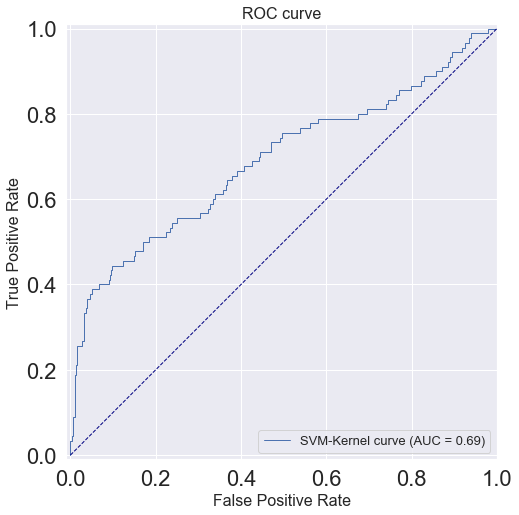

In [190]:
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve

fpr_svmk, tpr_svmk, _ = roc_curve(y_test, y_score_svmk)
roc_auc_svmk = auc(fpr_svmk, tpr_svmk)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_svmk, tpr_svmk, lw=1, label='{} curve (AUC = {:0.2f})'.format('SVM-Kernel',roc_auc_svmk))


plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

#        # SvC -Kernel trick is the best model so far with AUC of 0.69

# PCA

In [191]:
X.shape

(4119, 62)

In [192]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 0.95)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)

In [193]:
X_train_reduced.shape

(3295, 40)

In [194]:
X_test_reduced = pca.transform(X_test)

# PCA on KNN 

In [195]:
knn_clf.fit(X_train_reduced, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [196]:
print('Train score: ', knn_clf.score(X_train_reduced, y_train))
print('Test score: ', knn_clf.score(X_test_reduced, y_test))

Train score:  0.9092564491654022
Test score:  0.8883495145631068


In [197]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, knn_clf.predict(X_test_reduced))
confusion

array([[716,  18],
       [ 74,  16]], dtype=int64)

In [198]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, knn_clf.predict(X_test_reduced))
accuracy

0.8883495145631068

In [199]:
precision = precision_score(y_test, knn_clf.predict(X_test_reduced))
precision

0.47058823529411764

In [200]:
recall = recall_score(y_test, knn_clf.predict(X_test_reduced))
recall

0.17777777777777778

In [201]:
f1 = f1_score(y_test, knn_clf.predict(X_test_reduced))
f1


0.25806451612903225

In [202]:
auc = roc_auc_score(y_test, knn_clf.predict(X_test_reduced))
auc

0.5766273085074175

In [203]:
PCA_results = pd.DataFrame(columns=('S.No','Model_Name','Train_score','Test_Score', 'Accuracy','precision','recall','f1','AUC'))

In [204]:
PCA_results.loc[len(PCA_results)]=[1,'PCA - Knn',knn_clf.score(X_train_reduced, y_train),knn_clf.score(X_test_reduced, y_test), accuracy, precision, recall, f1, auc]

In [205]:
PCA_results

,S.No,Model_Name,Train_score,Test_Score,Accuracy,precision,recall,f1,AUC
0,1,PCA - Knn,0.909256,0.88835,0.88835,0.470588,0.177778,0.258065,0.576627


# PCA on Logistic Regression

In [206]:
log_clf.fit(X_train_reduced, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [207]:
print('Train score: ', log_clf.score(X_train_reduced, y_train))
print('Test score: ', log_clf.score(X_test_reduced, y_test))

Train score:  0.9028831562974203
Test score:  0.8980582524271845


In [208]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, log_clf.predict(X_test_reduced))
confusion

array([[715,  19],
       [ 65,  25]], dtype=int64)

In [209]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, log_clf.predict(X_test_reduced))
accuracy

0.8980582524271845

In [210]:
precision = precision_score(y_test, log_clf.predict(X_test_reduced))
precision

0.5681818181818182

In [211]:
recall = recall_score(y_test, log_clf.predict(X_test_reduced))
recall

0.2777777777777778

In [212]:
f1 = f1_score(y_test, log_clf.predict(X_test_reduced))
f1


0.373134328358209

In [213]:
auc = roc_auc_score(y_test, log_clf.predict(X_test_reduced))
auc

0.6259461095973357

In [214]:
PCA_results.loc[len(PCA_results)]=[2, 'PCA-Logistic', log_clf.score(X_train_reduced, y_train),log_clf.score(X_test_reduced, y_test), accuracy, precision, recall, f1, auc]

In [215]:
PCA_results

,S.No,Model_Name,Train_score,Test_Score,Accuracy,precision,recall,f1,AUC
0,1,PCA - Knn,0.909256,0.888350,0.888350,0.470588,0.177778,0.258065,0.576627
1,2,PCA-Logistic,0.902883,0.898058,0.898058,0.568182,0.277778,0.373134,0.625946


# PCA on Linear SVM

In [216]:
svm_clf.fit(X_train_reduced, y_train)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [217]:
print('Train score: ', svm_clf.score(X_train_reduced, y_train))
print('Test score: ', svm_clf.score(X_test_reduced, y_test))

Train score:  0.9004552352048558
Test score:  0.8968446601941747


In [218]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, svm_clf.predict(X_test_reduced))
confusion

array([[712,  22],
       [ 63,  27]], dtype=int64)

In [219]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, svm_clf.predict(X_test_reduced))
accuracy

0.8968446601941747

In [220]:
precision = precision_score(y_test, svm_clf.predict(X_test_reduced))
precision

0.5510204081632653

In [221]:
recall = recall_score(y_test, svm_clf.predict(X_test_reduced))
recall

0.3

In [222]:
f1 = f1_score(y_test, svm_clf.predict(X_test_reduced))
f1


0.3884892086330935

In [223]:
auc = roc_auc_score(y_test, svm_clf.predict(X_test_reduced))
auc

0.6350136239782016

In [224]:
PCA_results.loc[len(PCA_results)]=[3,'Linear SVC',svm_clf.score(X_train_reduced, y_train),svm_clf.score(X_test_reduced, y_test), accuracy, precision, recall, f1, auc]
PCA_results

,S.No,Model_Name,Train_score,Test_Score,Accuracy,precision,recall,f1,AUC
0,1,PCA - Knn,0.909256,0.888350,0.888350,0.470588,0.177778,0.258065,0.576627
1,2,PCA-Logistic,0.902883,0.898058,0.898058,0.568182,0.277778,0.373134,0.625946
2,3,Linear SVC,0.900455,0.896845,0.896845,0.551020,0.300000,0.388489,0.635014


# PCA on SVM with Kernel

In [225]:
svmk_clf.fit(X_train_reduced, y_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [226]:
print('Train score: ', svmk_clf.score(X_train_reduced, y_train))
print('Test score: ', svmk_clf.score(X_test_reduced, y_test))

Train score:  0.9016691957511381
Test score:  0.9004854368932039


In [227]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, svmk_clf.predict(X_test_reduced))
confusion

array([[719,  15],
       [ 67,  23]], dtype=int64)

In [228]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, svmk_clf.predict(X_test_reduced))
accuracy

0.9004854368932039

In [229]:
precision = precision_score(y_test, svmk_clf.predict(X_test_reduced))
precision

0.6052631578947368

In [230]:
recall = recall_score(y_test, svmk_clf.predict(X_test_reduced))
recall

0.25555555555555554

In [231]:
f1 = f1_score(y_test, svmk_clf.predict(X_test_reduced))
f1


0.359375

In [232]:
auc = roc_auc_score(y_test, svmk_clf.predict(X_test_reduced))
auc

0.6175597941265516

In [233]:
PCA_results.loc[len(PCA_results)]=[4,'SVC- Kernel trick',svmk_clf.score(X_train_reduced, y_train),svmk_clf.score(X_test_reduced, y_test), accuracy, precision, recall, f1, auc]
PCA_results

,S.No,Model_Name,Train_score,Test_Score,Accuracy,precision,recall,f1,AUC
0,1,PCA - Knn,0.909256,0.888350,0.888350,0.470588,0.177778,0.258065,0.576627
1,2,PCA-Logistic,0.902883,0.898058,0.898058,0.568182,0.277778,0.373134,0.625946
2,3,Linear SVC,0.900455,0.896845,0.896845,0.551020,0.300000,0.388489,0.635014
3,4,SVC- Kernel trick,0.901669,0.900485,0.900485,0.605263,0.255556,0.359375,0.617560


# PCA on Linear SVC-RBF

In [234]:
svmrbf_clf.fit(X_train_reduced, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [235]:
print('Train score: ', svmrbf_clf.score(X_train_reduced, y_train))
print('Test score: ', svmrbf_clf.score(X_test_reduced, y_test))

Train score:  0.9119878603945372
Test score:  0.8980582524271845


In [236]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, svmrbf_clf.predict(X_test_reduced))
confusion

array([[717,  17],
       [ 67,  23]], dtype=int64)

In [237]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, svmrbf_clf.predict(X_test_reduced))
accuracy

0.8980582524271845

In [238]:
precision = precision_score(y_test, svmrbf_clf.predict(X_test_reduced))
precision

0.575

In [239]:
recall = recall_score(y_test, svmrbf_clf.predict(X_test_reduced))
recall

0.25555555555555554

In [240]:
f1 = f1_score(y_test, svmrbf_clf.predict(X_test_reduced))
f1

0.35384615384615387

In [241]:
auc = roc_auc_score(y_test, svmrbf_clf.predict(X_test_reduced))
auc

0.6161973963063881

In [242]:
PCA_results.loc[len(PCA_results)]=[5,'SVC- RBF',svmrbf_clf.score(X_train_reduced, y_train),svmrbf_clf.score(X_test_reduced, y_test), accuracy, precision, recall, f1, auc]
PCA_results

,S.No,Model_Name,Train_score,Test_Score,Accuracy,precision,recall,f1,AUC
0,1,PCA - Knn,0.909256,0.888350,0.888350,0.470588,0.177778,0.258065,0.576627
1,2,PCA-Logistic,0.902883,0.898058,0.898058,0.568182,0.277778,0.373134,0.625946
2,3,Linear SVC,0.900455,0.896845,0.896845,0.551020,0.300000,0.388489,0.635014
3,4,SVC- Kernel trick,0.901669,0.900485,0.900485,0.605263,0.255556,0.359375,0.617560
4,5,SVC- RBF,0.911988,0.898058,0.898058,0.575000,0.255556,0.353846,0.616197


# PCA on Decision Tree

In [243]:
t_clf.fit(X_train_reduced, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [244]:
print('Train score: ', t_clf.score(X_train_reduced, y_train))
print('Test score: ', t_clf.score(X_test_reduced, y_test))

Train score:  0.9031866464339909
Test score:  0.8907766990291263


In [245]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, t_clf.predict(X_test_reduced))
confusion

array([[720,  14],
       [ 76,  14]], dtype=int64)

In [246]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, t_clf.predict(X_test_reduced))
accuracy

0.8907766990291263

In [247]:
precision = precision_score(y_test, t_clf.predict(X_test_reduced))
precision

0.5

In [248]:
recall = recall_score(y_test, t_clf.predict(X_test_reduced))
recall

0.15555555555555556

In [249]:
f1 = f1_score(y_test, t_clf.predict(X_test_reduced))
f1

0.23728813559322035

In [250]:
auc = roc_auc_score(y_test, t_clf.predict(X_test_reduced))
auc

0.5682409930366333

In [251]:
PCA_results.loc[len(PCA_results)]=[6,'Decision Tree Classifier',t_clf.score(X_train_reduced, y_train),t_clf.score(X_test_reduced, y_test), accuracy, precision, recall, f1, auc]

In [252]:
PCA_results

,S.No,Model_Name,Train_score,Test_Score,Accuracy,precision,recall,f1,AUC
0,1,PCA - Knn,0.909256,0.888350,0.888350,0.470588,0.177778,0.258065,0.576627
1,2,PCA-Logistic,0.902883,0.898058,0.898058,0.568182,0.277778,0.373134,0.625946
2,3,Linear SVC,0.900455,0.896845,0.896845,0.551020,0.300000,0.388489,0.635014
3,4,SVC- Kernel trick,0.901669,0.900485,0.900485,0.605263,0.255556,0.359375,0.617560
4,5,SVC- RBF,0.911988,0.898058,0.898058,0.575000,0.255556,0.353846,0.616197
5,6,Decision Tree Classifier,0.903187,0.890777,0.890777,0.500000,0.155556,0.237288,0.568241


Both Logistic and Linear SVC with Kernel give good results. 

# Apply Deep Learning models

In [253]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(0)

In [254]:
# step 1: build the model
model1 = Sequential()
#input layer
model1.add(Dense(10, input_dim = 15, activation='relu'))
#hidden layer
model1.add(Dense(5), activation = 'relu')
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

# step 2 : build the computational graph -compile
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#step3 : train the model
model1.fit(X_train, y_train, epochs =20, batch_size =100)

Instructions for updating:
Colocations handled automatically by placer.


TypeError: add() got an unexpected keyword argument 'activation'

In [ ]:
model1.evaluate(X_train, y_train)

In [ ]:
model1.evaluate(X_test, y_test)

In [ ]:
y_pred = model1.predict(X_train)

In [ ]:
from sklearn.metrics import recall_score
y_train_pred = np.where(y_pred >= 0.5, 1, 0)
print(recall_score(y_train, y_train_pred))
print(precision_score(y_train, y_train_pred))
print(accuracy_score(y_train, y_train_pred))


In [ ]:
y_pred_neural = model1.predict(X_test)
y_test_pred = np.where(y_pred_neural >= 0.5, 1, 0)
acc_sc_neural =round(accuracy_score(y_test, y_test_pred),4)
print(acc_sc_neural)
rec_sc_neural = round(recall_score(y_test, y_test_pred),4)
f1_sc_neural = round(f1_score(y_test, y_test_pred),4)
auc_sc_neural =round(roc_auc_score(y_test, y_test_pred),4))
print(rec_sc_neural)
print(precision_score(y_test, y_test_pred))